# Fraunhofer diffraction at a single slit.

In [40]:
from IPython.display import HTML
HTML('''
        <style>
                .prompt{display: None;}
                
                .output_wrapper button.btn.btn-default,
                .output_wrapper .ui-dialog-titlebar {display: none;} <!-- hide toolbars and buttons of the plot -->
                
        </style>
        <script>
                code_show=true; 
                function code_toggle() 
                {
                     if (code_show)
                     {
                         $('div.input').hide();
                     } else
                     {
                         $('div.input').show();
                     }
                     code_show = !code_show
                } 
                $( document ).ready(code_toggle);
        </script>
        The raw code for this IPython notebook is by default hidden for easier reading.
        To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.
        ''')

Suppose that a collimated monochromatic beam of light falls on a screen with a slit (widht $b$)
in it. At a certain distance $z$ from the slit a diffraction pattern can be observed on a second screen. The structure of the pattern depends on the wavelength, $λ$, the slit width $b$, and the distance, $z$. Depensing on these parameters we can describe the observed pattern using the Fraunhofer diffraction theory. However, Fraunhofer is only valid in the far field. Depending on the values chosen for $b$ and $z$ Fraunhofer no longer holds and the Fresnel diffraction theory should be applied. Here we explore the validity of the Fraunhofer approximation given some values for $z$ and $b$. In Hecht a rule-of-thumb is given for the validity of Fraunhofer. For the situation described here (see the figure below) this rule-of-thumb translates to:

$$ z \gt \frac{b^2}{\lambda} $$

<br>

<div>
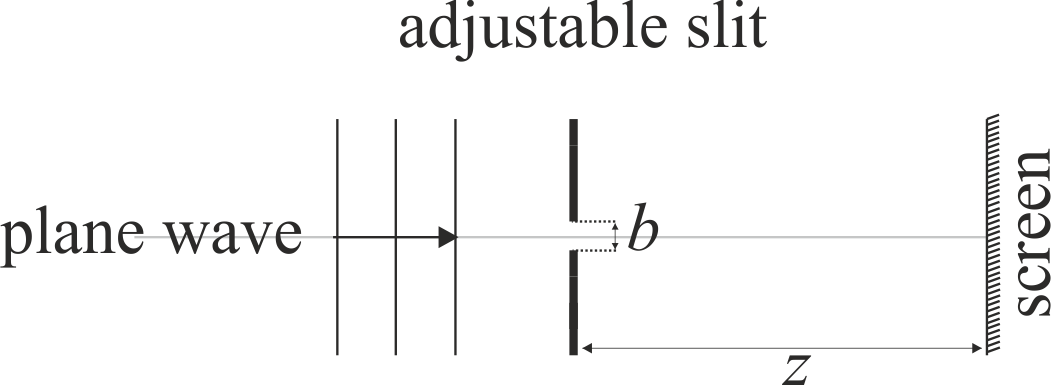
</div>


> *Setup of the diffraction experiment. A plane wave (with a Gaussian intensity distribution) enters a slit in a screen. The diffraction pattern is observed at a distance $z$*


Literature:Hecht, 5th ed., chapter 10.

### Fraunhofer diffraction.

We set the distance of the screen at $z=100$ cm and start with a small slit width $d=50$ $\mu$m.
1. Show (from theory) that (in the Fraunhofer approximation) the intensity at the optical axis scales quadratically with the slit width. This condition is used to test the range for which Fraunhofer is valid.
2. Using the simulation determine by observing the shape of the diffraction pattern for what slit width $b$ the diffraction pattern starts to deviate from what can be expected from Fraunhofer.
3. Measure (using the simulation) the intensity at the optical axis for various slit widths $b$ and plot such that you expect a straight line in the Fraunhofer regime.
4. Evaluate if your results for (3) and (4) correspond to what may be expected from theory (see equation above). 





<IPython.core.display.Javascript object>


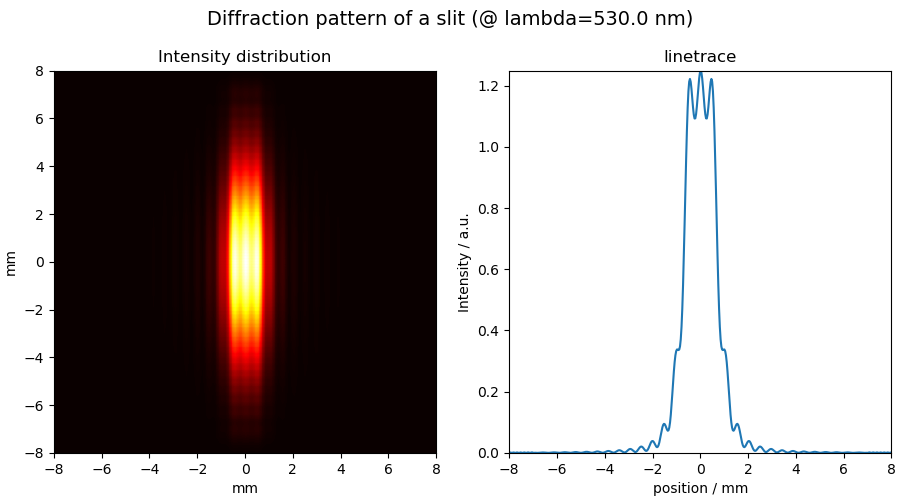

interactive(children=(FloatSlider(value=100.0, continuous_update=False, description='Distance $z$ [cm]', layou…

In [19]:
%matplotlib notebook
#!/usr/bin/env python
"""
    Computer practical 6.1. Fresnel diffraction, plane wavefront.
    =============================================================

    This is part of the 'computer practical' set of assignments.
    Demonstrates Fresnel diffraction when a plane wavefront enters 
    a round hole.
    Measure the values of z and d for which minima and/or maxima on-axis occur
    and apply the Fresnel-zone theory to find the wavelength of the light.
"""
from ipywidgets import interact
import ipywidgets as widgets
import matplotlib.pyplot as plt
import LightPipes as lp
import numpy as np

# initialise parameters
wavelength = 530e-9
size = 16e-3
N = 500
N2 = int(N/2)
beam_width = 4e-3  # width of the Gauss beam


# creating the plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,5), constrained_layout=True)
fig.suptitle(f'Diffraction pattern of a slit (@ lambda={wavelength*1e9} nm)', fontsize=14)
ax1.set_aspect('equal', 'box')
ax1.set_title('Intensity distribution' )
ax1.set_xlabel('mm')
ax1.set_ylabel('mm')
ext = size*1e3/2
img = ax1.imshow([[]], cmap='hot', extent=[-ext, ext, -ext, ext])

x_scale = np.linspace(-ext, ext, N, endpoint=True)
line, = ax2.plot([],[])
ax2.set_title('linetrace')
ax2.set_xlim(-ext, ext)
ax2.set_ylim(0, 2)
ax2.set_aspect(2*ext/2)
ax2.set_xlabel('position / mm')
ax2.set_ylabel('Intensity / a.u.')


plt.show()


def Diffraction(z, b):
    """
    Calculates and plots the diffraction pattern of a slit with width d
    on a screen at a distance z from the slit 
    """
    # convert dimensions to meters
    z = z*1e-2
    b = b*1e-6
    
    # propagate beam
    F = lp.Begin(size, wavelength, N)
    F = lp.GaussAperture(beam_width, 0, 0, 1, F)  # create a Gaussbeam profile 
    F = lp.RectAperture(b, size, 0, 0, 0, F)  # propagate through the slit
    F = lp.Fresnel(z, F)  # propagate over distance z
    I = lp.Intensity(0, F)
    
    # plot the diffraction pattern
    line.set_data(x_scale, I[N2][:])  # cross sectional linetrace through the center
    ymax = np.max(I[N2][:])
    ax2.set_ylim(0, ymax)
    ax2.set_aspect(2*ext/ymax)
    img.set_data(I)
    img.autoscale()
    ax1.format_coord = lambda x, y: f'x = {x:2.2f} mm,\
                                        y = {y:2.2f} mm, \
                                        Intensity = '

    return None

# create interactive widgets
w = interact(Diffraction, \
                z = widgets.FloatSlider(layout={'width':'initial'}, style={'description_width':'initial'}, 
                                        description=r'Distance $z$ [cm]', min=0.01,max=200.0,step=0.01,value=100.0,
                                        continuous_update=False), \
                b = widgets.FloatSlider(layout={'width':'initial'}, style={'description_width':'initial'}, 
                                        description=r'Slit width $b$ [$\mu$m]',min=100.,max=4000.,step=50.,value=100.,
                                        continuous_update=False) 
            )